In [14]:
# Importinh neccessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mtcnn
import glob
import cv2

In [8]:
# Where images are stored
dir  = './Dataset/'

In [9]:
# Celebrity to be trained first
names = [
    'alexandro_dadario','aishwarya_rae','burak_deniz','chris_hemsworth','elon_musk','gayatri_bharadwaj',
    'hande_ercel','virat_kohli','ronaldo','sushant','samantha','hritik_roshan','priyanka_chopra',
    'nidhi_agarwal','kit_harington','kristen_stewart','nayantra','rasmika_mandhana','sundar_pichai',
    'zayn_malik','scarlet_johnson','amber_heard','sanjana_sanghi','mahesh_babu','vicky_kaushal',
    'priya','modiji','DeepikaPadukone','chris_evans','ana_de_armas'
]

In [10]:
len(names)

30

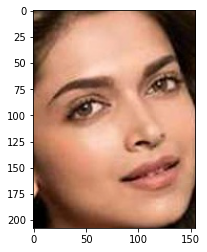

In [11]:
# Read the image and plot it too
plt.imshow(plt.imread('./New_data/DeepikaPadukone/1006.jpg'))

In [28]:
""" An image may contain many persons , one ways to detect no of persons is to look for the faces and MTCNN 
will crop the faces and will train the model on those faces """
res = mtcnn.MTCNN().detect_faces(img)

1/1 [==============================] - 0s 175ms/step


2022-07-25 03:02:32.707980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 111ms/step


2022-07-25 03:02:33.155897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 1s 10ms/step


2022-07-25 03:02:35.403928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 170ms/step


2022-07-25 03:02:35.702579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [29]:
""" Result from mtcnn is a dictionary where the confidence is the probability with which model detect face
    box has 4 values x,y ,w,h . A face can be enclosed in a rectangle , x,y are vertices of top left
    vertex and w, h are width and height from it
"""
res

[{'box': [281, 187, 576, 642],
  'confidence': 0.9999147653579712,
  'keypoints': {'left_eye': (444, 544),
   'right_eye': (647, 393),
   'nose': (621, 582),
   'mouth_left': (603, 736),
   'mouth_right': (753, 615)}}]

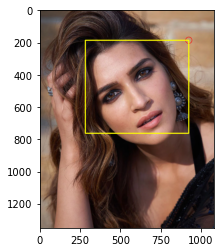

In [35]:
## We draw a rectangle around the face detected
x,y,w,h = res[0]['box']
ims= cv2.rectangle(img,(x,y),(x+h,y+w),(255, 255, 0),5)
plt.imshow(ims)

In [15]:
# function to get all the faces found in the image
def getfaces(img):
    array = []
    img = cv2.imread(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    result = mtcnn.MTCNN().detect_faces(img)
    for res in result:
        if res['confidence'] >= .995:
            x,y,w,h = res['box']
            image = img[y:y+h,x:x+w]
            array.append(image)
    return array

In [13]:
# convert the img url to preprocessed numpy array
def readimage(url):
    img = cv2.imread(url)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.asarray(img).astype('float32')
    img = cv2.resize(img,(160,160))
    img = img/255.0
    return img
    

In [18]:
""" Loop over all the celebrity names , get the image urls of their corresponding directory,convert the image
to numpy array , get the  faces from the image , crop all the faces , save it locally"""
cnt=1;
for name in names:
    if name not in os.listdir('./New_data/'):
        os.mkdir(f'./New_data/{name}')
    print(f'Cropping {name}')
    for img in glob.glob(f'./Dataset/{name}/*.jpg'):
        image = readimage(img)
        faces = getfaces(image)
        for face in faces:
            if face['confidence'] >= .99:
                x,y,w,h = face['box']
                image = img[y:y+h,x:x+w]
                image = cv2.resize(image,(160,160))
                image = image.astype('float32')
                cv2.imread(f'./New_data/{name}/{cnt}.jpg')
                cnt+=1

        
    
    

Cropping alexandro_dadario
Cropping aishwarya_rae
Cropping burak_deniz
Cropping chris_hemsworth
Cropping elon_musk
Cropping gayatri_bharadwaj
Cropping hande_ercel
Cropping virat_kohli
Cropping ronaldo
Cropping sushant
Cropping samantha
Cropping hritik_roshan
Cropping priyanka_chopra
Cropping nidhi_agarwal
Cropping kit_harington
Cropping kristen_stewart
Cropping nayantra
Cropping rasmika_mandhana
Cropping sundar_pichai
Cropping zayn_malik
Cropping scarlet_johnson
Cropping amber_heard
Cropping sanjana_sanghi
Cropping mahesh_babu
Cropping vicky_kaushal
Cropping priya
Cropping modiji
Cropping DeepikaPadukone
Cropping chris_evans
Cropping ana_de_armas
